# I. Reading, understanding and prepocessing the data

## Import Libraries and Import Data

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df_org = pd.read_csv("Telco_Churn_Data.csv")
df = df_org.copy()

## Overview of the Dataset


In [ ]:
df

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,Churn,1,11231,2424.000000,12282.3333,18,0.045455,Gold,Call Quality,18.0,4,0.0,0,NaN,30.0
4704,Churn,1,9237,8831.333330,20083.6667,24,-0.160437,Silver,Billing Problem,16.2,5,0.0,0,NaN,0.0
4705,No Churn,0,18384,3219.000000,25610.0000,23,-0.584683,Silver,Call Quality,10.5,5,0.0,0,NaN,27.2
4706,Churn,1,44133,34627.000000,83341.3333,38,-0.373016,Silver,Call Quality,31.7,6,0.0,0,NaN,59.0


The data from the "Telco_Churn_Data.csv" file appears to be related to customer information and behavior in a telecommunications context, with a specific focus on churn analysis. Here's an overview of the columns in the dataset:

1. **Target Churn**: Indicates whether the customer has churned or not ("Churn" or "No Churn").
2. **Target Code**: Numeric code representing the churn status (likely 0 for "No Churn" and 1 for "Churn").
3. **Current Bill Amt**: The current bill amount for the customer.
4. **Avg Calls**: Average number of calls made by the customer.
5. **Avg Calls Weekdays**: Average number of calls made by the customer on weekdays.
6. **Account Age**: The age of the customer's account in months or years.
7. **Percent Increase MOM**: Percentage increase in usage or some metric Month Over Month.
8. **Acct Plan Subtype**: Type of account plan the customer is subscribed to (e.g., Gold, Silver).
9. **Complaint Code**: Reason for customer complaints (e.g., "Billing Problem", "Moving").
10. **Avg Days Delinquent**: Average number of days the customer's payment is overdue.
11. **Current TechSupComplaints**: Number of current technical support complaints.
12. **Current Days OpenWorkOrders**: Number of days current work orders have been open.
13. **Equipment Age**: Age of the equipment provided to the customer.
14. **Condition of Current Handset**: Numerical rating of the condition of the customer's current handset.
15. **Avg Hours WorkOrderOpenned**: Average hours that work orders have been open.

This dataset is valuable for analyzing factors that may influence customer churn, such as billing issues, service complaints, account and equipment age, and customer service metrics. Understanding these factors can help in developing strategies to reduce churn and improve customer retention.

In [ ]:
df_num_rows, df_num_cols = df.shape
print(f'DF \nNumber of rows : {df_num_rows}\nNumber of columns: {df_num_cols}')

DF 
Number of rows : 4708
Number of columns: 15


In [ ]:
print("Columns: ", df.columns)

Columns:  Index(['Target Churn', 'Target Code', 'Current Bill Amt', 'Avg Calls',
       'Avg Calls Weekdays', 'Account Age', 'Percent Increase MOM',
       'Acct Plan Subtype', 'Complaint Code', 'Avg Days Delinquent',
       'Current TechSupComplaints', 'Current Days OpenWorkOrders',
       'Equipment Age', 'Condition of Current Handset',
       'Avg Hours WorkOrderOpenned'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [ ]:
df.describe()

,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


## Checking and Processing Null Value


In [ ]:
df.isnull().sum()
print("Total null entry rows in DF: " + str(df.isnull().sum()))
print("----------")
print("Total null entry rows in DF: " + str(df.isnull().sum().sum()))

Total null entry rows in DF: Target Churn                      0
Target Code                       0
Current Bill Amt                  0
Avg Calls                         0
Avg Calls Weekdays                0
Account Age                       0
Percent Increase MOM              0
Acct Plan Subtype                 0
Complaint Code                    7
Avg Days Delinquent               0
Current TechSupComplaints         0
Current Days OpenWorkOrders       0
Equipment Age                     0
Condition of Current Handset    444
Avg Hours WorkOrderOpenned        0
dtype: int64
----------
Total null entry rows in DF: 451


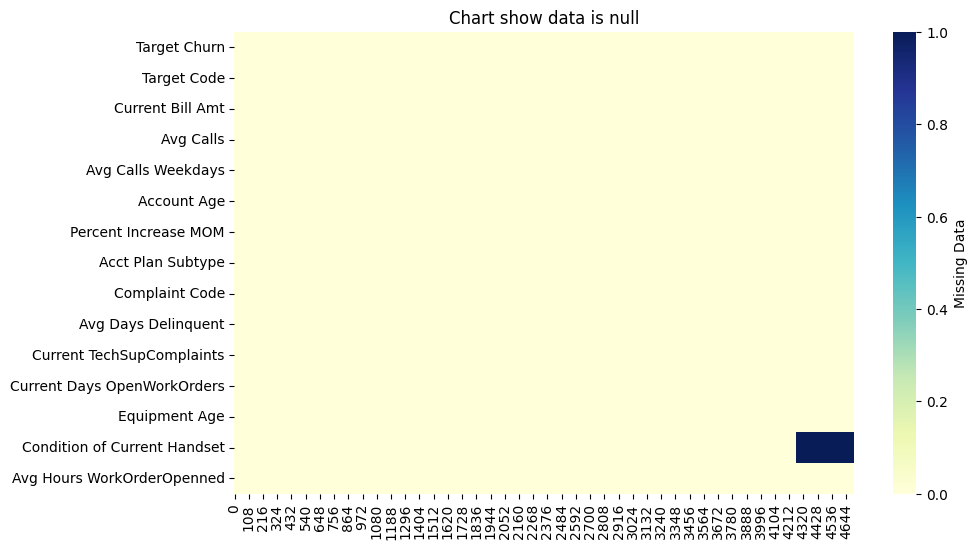

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Chart show data is null')
plt.show()

- Có **7 giá trị** Null xuất hiện ở cột **'Complaint Code'**
- Có **444 giá trị** Null xuất hiện ở cột **'Condition of Current Handset'**

In [ ]:
# Determine the most frequent value (mode) for the 'Complaint Code' column
complaint_code_mode = df['Complaint Code'].mode()[0]

# For 'Condition of Current Handset', we need to check the distribution to decide between mean and median
handset_condition_mean = df['Condition of Current Handset'].mean()
handset_condition_median = df['Condition of Current Handset'].median()

# Replace null values in 'Complaint Code' with its mode
df['Complaint Code'].fillna(complaint_code_mode, inplace=True)

# Decide whether to use mean or median for 'Condition of Current Handset'
# This decision is based on the assumption that if mean and median are close, the distribution is likely not skewed
if abs(handset_condition_mean - handset_condition_median) / handset_condition_mean < 0.1:
    replacement_value = handset_condition_mean
else:
    replacement_value = handset_condition_median

# Replace null values in 'Condition of Current Handset' with the chosen value
df['Condition of Current Handset'].fillna(replacement_value, inplace=True)

# Replace null values in 'Complaint Code' with its mode
df['Complaint Code'].fillna(complaint_code_mode, inplace=True)

# Check again for missing values to confirm the replacements
missing_values_after = df.isnull().sum()
missing_values_after[missing_values_after > 0], replacement_value, handset_condition_mean, handset_condition_median


(Series([], dtype: int64), 1.0192307692307692, 1.0192307692307692, 1.0)

- We first calculates the mode (most frequent value) of the 'Complaint Code' column and stores it in the variable **complaint_code_mode**. Then we replaces missing values in the 'Complaint Code' column with the previously calculated mode value using the fillna method.

- Secondly, we calculates both the mean (handset_condition_mean) and median (handset_condition_median) values for the **'Condition of Current Handset'** column. This step is done to decide between using the mean or median for imputing missing values. It makes a decision on whether to use the mean or median for imputing missing values in the 'Condition of Current Handset' column. If the absolute difference between the mean and median divided by the mean is less than 10%, it chooses the mean as the replacement value; otherwise, it selects the median. Finally, it replaces missing values in the 'Condition of Current Handset' column with the chosen replacement value and checks again for any remaining missing values in the DataFrame, storing the result in missing_values_after.

## Checking and Processing Duplicated Value


In [ ]:
df.duplicated().sum()

0

- So in this data thers is no Duplicated Value or row. Now we are all ready to EDA it


# EDA

## 2. Phân tích Mối quan hệ giữa các biến

<ipython-input-88-5a949e2b8281>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


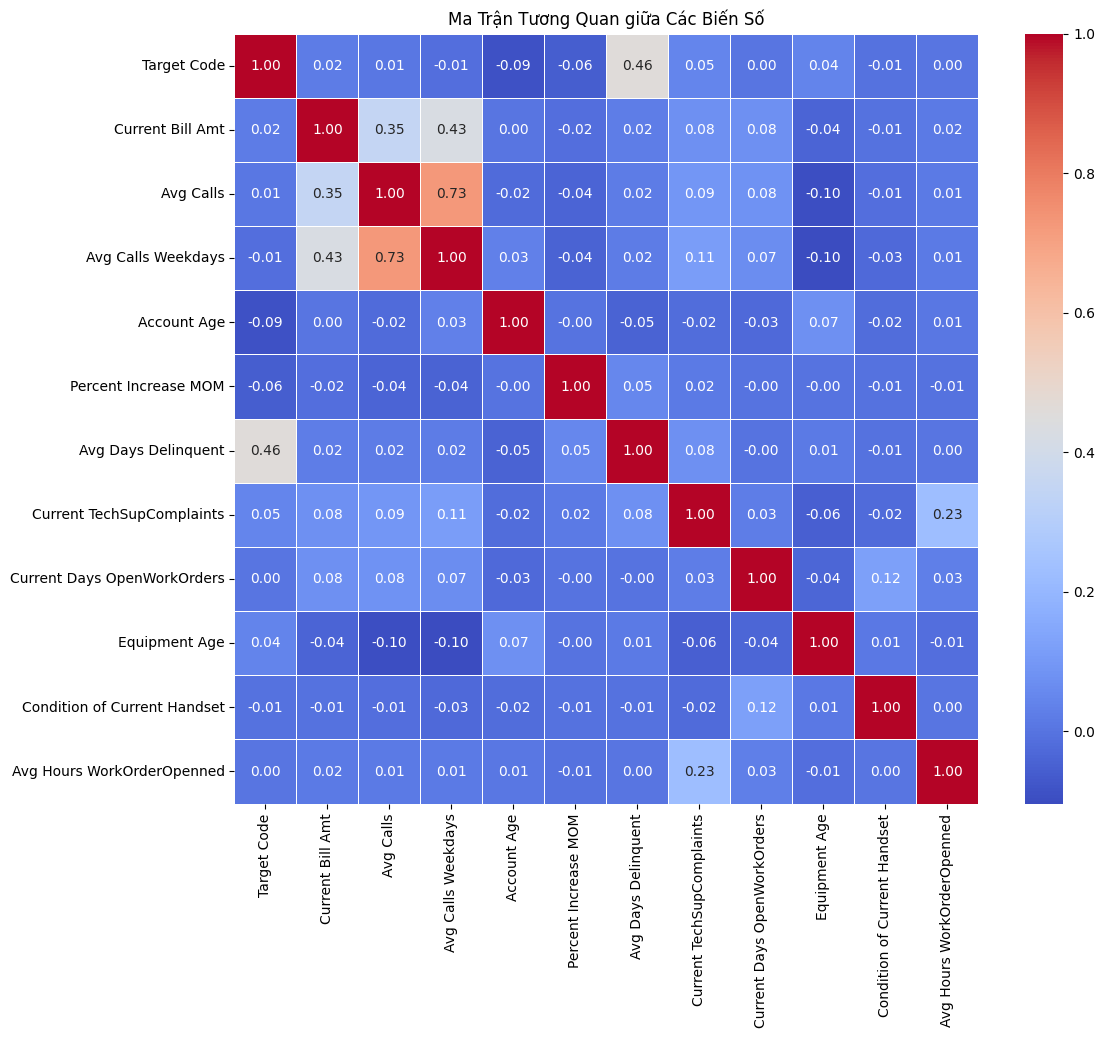

In [ ]:
# Correlation Matrix: Tạo ma trận tương quan giữa các biến số để hiểu mối quan hệ giữa chúng.
# Tạo ma trận tương quan giữa các biến số
correlation_matrix = df.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma Trận Tương Quan giữa Các Biến Số')
plt.show()

Biểu đồ heatmap trên cho thấy ma trận tương quan giữa các biến số trong tập dữ liệu. Mỗi ô trong heatmap thể hiện mức độ tương quan giữa hai biến, với giá trị từ -1 đến +1. Giá trị +1 chỉ ra một mối quan hệ tương quan dương mạnh mẽ (khi một biến tăng, biến kia cũng tăng), giá trị -1 chỉ ra một mối quan hệ tương quan âm mạnh mẽ (khi một biến tăng, biến kia giảm), và giá trị 0 chỉ ra không có mối quan hệ tương quan.

### Insight:

1. **Các Mối Quan Hệ Đáng Chú Ý**: Xác định những cặp biến có mức độ tương quan cao (dương hoặc âm). Ví dụ, nếu 'Avg Calls' và 'Current Bill Amt' có tương quan dương mạnh, điều này có thể chỉ ra rằng khách hàng sử dụng nhiều dịch vụ hơn thường có hóa đơn cao hơn.

2. **Mối Quan Hệ với Churn**: Đặc biệt chú ý đến các biến có mối quan hệ tương quan với 'Target Code' (chỉ số churn). Các biến này có thể là những yếu tố chính ảnh hưởng đến quyết định churn của khách hàng.

3. **Cân Nhắc Đa Cộng Tuyến**: Nếu hai biến có mối quan hệ tương quan rất cao với nhau, việc sử dụng cả hai trong các mô hình dự báo có thể không hiệu quả và cần cân nhắc loại bỏ hoặc kết hợp chúng.

Ma trận tương quan này là một công cụ hữu ích để hiểu rõ hơn về mối quan hệ giữa các biến và hỗ trợ trong việc xác định các yếu tố chính có thể ảnh hưởng đến churn, từ đó giúp doanh nghiệp phát triển chiến lược hiệu quả hơn trong việc quản lý và giữ chân khách hàng.

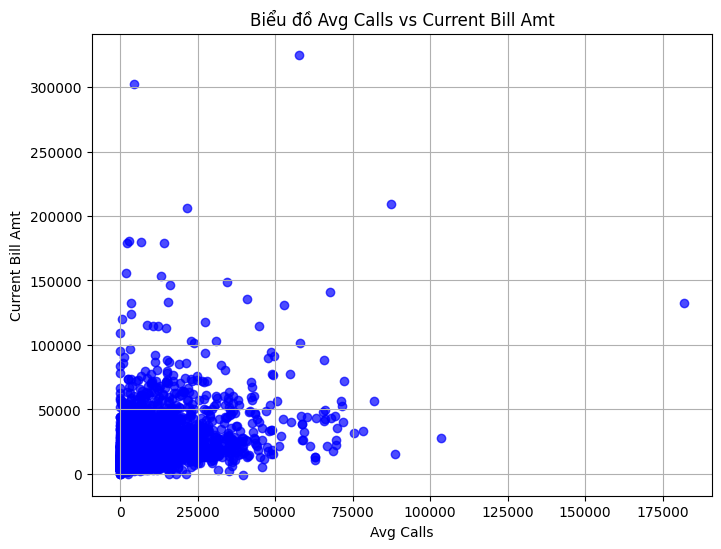

In [ ]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter('Avg Calls', 'Current Bill Amt',data = df, color='b', marker='o', alpha=0.7)
plt.title('Biểu đồ Avg Calls vs Current Bill Amt')
plt.xlabel('Avg Calls')
plt.ylabel('Current Bill Amt')
plt.grid(True)
plt.show()

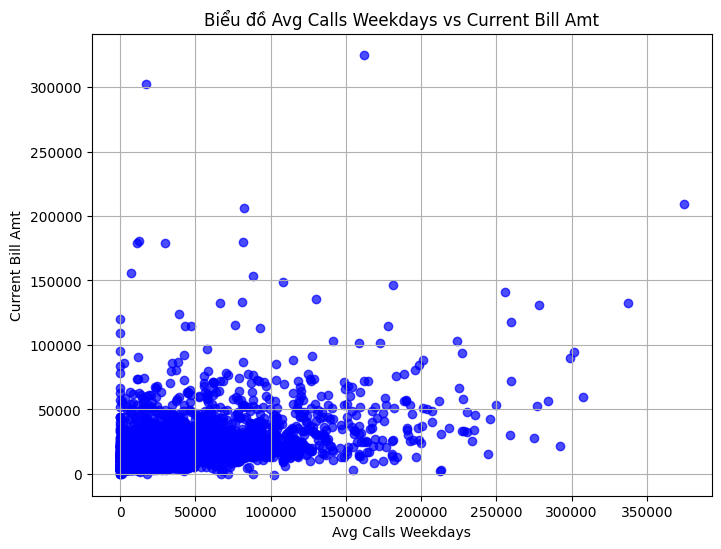

In [ ]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter('Avg Calls Weekdays', 'Current Bill Amt',data = df, color='b', marker='o', alpha=0.7)
plt.title('Biểu đồ Avg Calls Weekdays vs Current Bill Amt')
plt.xlabel('Avg Calls Weekdays')
plt.ylabel('Current Bill Amt')
plt.grid(True)
plt.show()

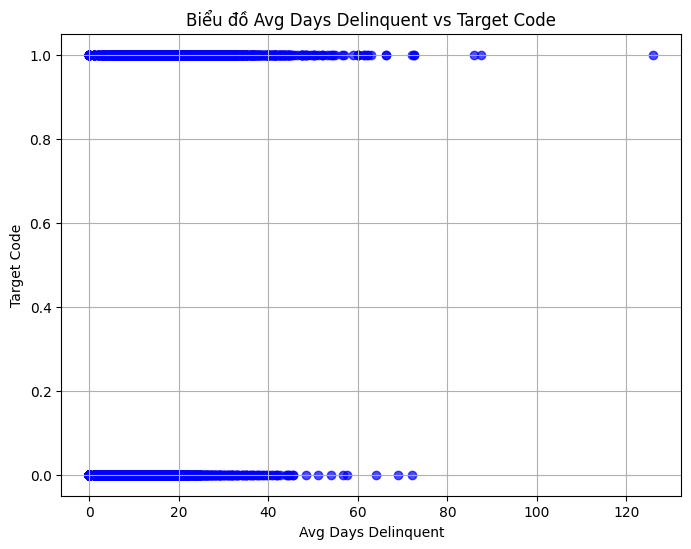

In [ ]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter('Avg Days Delinquent', 'Target Code',data = df, color='b', marker='o', alpha=0.7)
plt.title('Biểu đồ Avg Days Delinquent vs Target Code')
plt.xlabel('Avg Days Delinquent')
plt.ylabel('Target Code')
plt.grid(True)
plt.show()

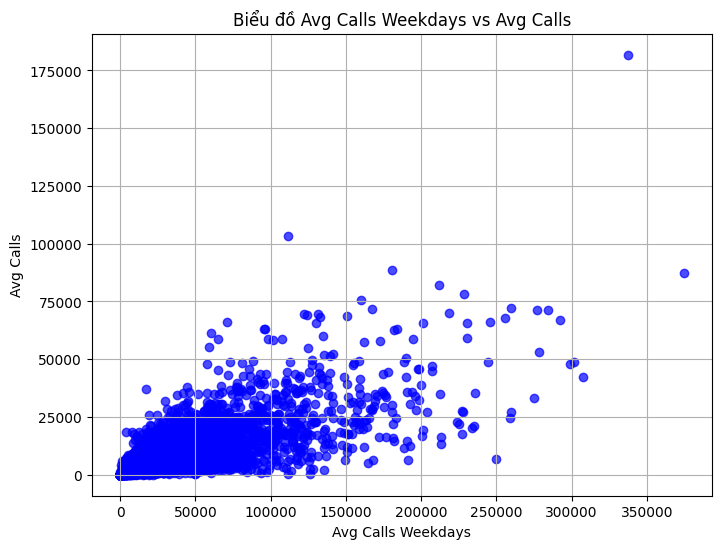

In [ ]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter('Avg Calls Weekdays', 'Avg Calls',data = df, color='b', marker='o', alpha=0.7)
plt.title('Biểu đồ Avg Calls Weekdays vs Avg Calls')
plt.xlabel('Avg Calls Weekdays')
plt.ylabel('Avg Calls')
plt.grid(True)
plt.show()

## 1. Phân tích Churn

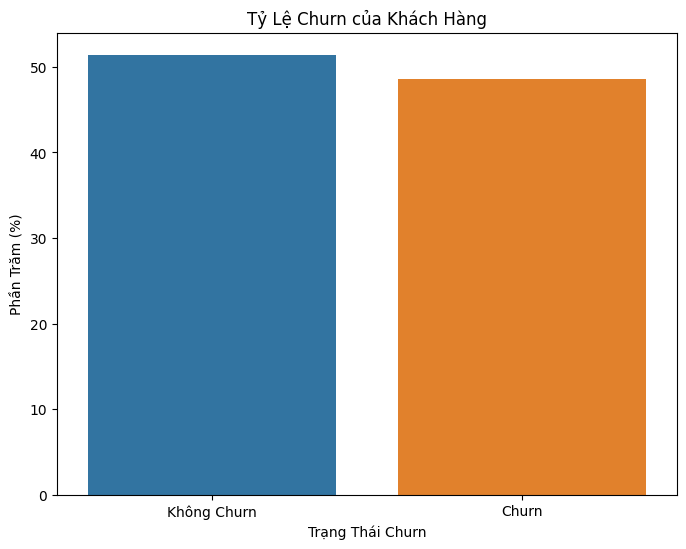

48.576890399320305

In [ ]:
# Tỉ lệ Churn: Tính tỷ lệ khách hàng chuyển đổi so với tổng số khách hàng.

# Tính tỷ lệ churn
churn_counts = df['Target Churn'].value_counts()
churn_rate = churn_counts / df.shape[0] * 100

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Tỷ Lệ Churn của Khách Hàng')
plt.xlabel('Trạng Thái Churn')
plt.ylabel('Phần Trăm (%)')
plt.xticks([0, 1], ['Không Churn', 'Churn'])

# Hiển thị biểu đồ
plt.show()

# Tính toán và hiển thị insight
churn_rate_percentage = churn_rate['Churn']
churn_rate_percentage

Biểu đồ trên cho thấy tỷ lệ churn của khách hàng trong tập dữ liệu. Dựa trên phân tích, khoảng 48.58% khách hàng đã chuyển đổi (churn).

**Insight:**
- Tỷ lệ churn gần bằng một nửa số lượng khách hàng, đây là một tỷ lệ khá cao, chỉ ra rằng có một vấn đề lớn về sự hài lòng hoặc giữ chân khách hàng trong doanh nghiệp này.
- Việc xác định và giải quyết các nguyên nhân chính dẫn đến churn sẽ là yếu tố then chốt để cải thiện hiệu suất kinh doanh.
- Cần tiến hành các phân tích sâu hơn để hiểu rõ hơn về những yếu tố cụ thể nào (ví dụ: vấn đề dịch vụ, giá cả, sự hài lòng của khách hàng, v.v.) đang ảnh hưởng đến quyết định churn của khách hàng.
- Các chiến lược như cải thiện chất lượng dịch vụ, tối ưu hóa các kế hoạch giá, và cung cấp hỗ trợ khách hàng tốt hơn có thể giúp giảm tỷ lệ churn.

Nhìn chung, việc phân tích và hiểu rõ nguyên nhân churn sẽ hỗ trợ doanh nghiệp trong việc xây dựng các chiến lược hiệu quả hơn nhằm giữ chân và tăng cường sự hài lòng của khách hàng.

<ipython-input-94-b6dc6f5ff368>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Acct Plan Subtype', y='Target Code', data=df, ci=None)
<ipython-input-94-b6dc6f5ff368>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.cut(df['Equipment Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
<ipython-input-94-b6dc6f5ff368>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.cut(df['Avg Days Delinquent'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130]),


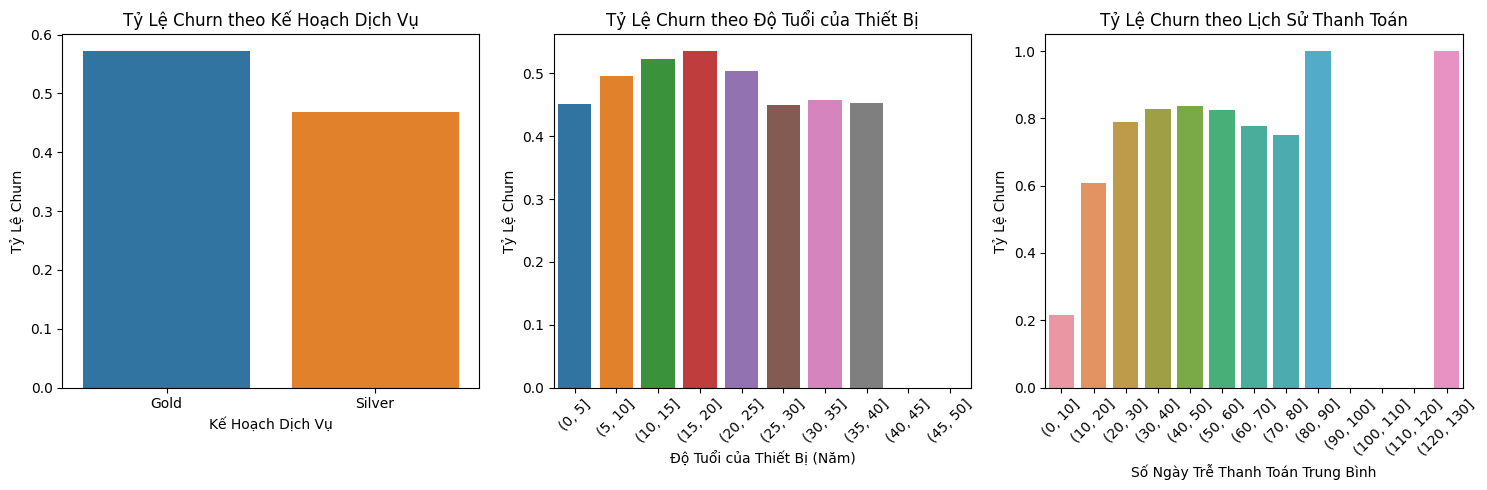

In [ ]:
# Phân tích Churn theo các nhóm khác nhau: Chia dữ liệu thành các nhóm dựa trên các thuộc tính khác nhau (ví dụ, theo kế hoạch dịch vụ, độ tuổi của thiết bị, lịch sử thanh toán) và xem xét tỷ lệ churn trong mỗi nhóm.
# Tạo các biểu đồ để phân tích tỷ lệ churn theo các nhóm khác nhau
plt.figure(figsize=(15, 5))

# Phân tích Churn theo Kế Hoạch Dịch Vụ
plt.subplot(1, 3, 1)
sns.barplot(x='Acct Plan Subtype', y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Kế Hoạch Dịch Vụ')
plt.xlabel('Kế Hoạch Dịch Vụ')
plt.ylabel('Tỷ Lệ Churn')

# Phân tích Churn theo Độ Tuổi của Thiết Bị
plt.subplot(1, 3, 2)
sns.barplot(x=pd.cut(df['Equipment Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
            y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Độ Tuổi của Thiết Bị')
plt.xlabel('Độ Tuổi của Thiết Bị (Năm)')
plt.ylabel('Tỷ Lệ Churn')
plt.xticks(rotation=45)

# Phân tích Churn theo Lịch Sử Thanh Toán (sử dụng 'Avg Days Delinquent')
plt.subplot(1, 3, 3)
sns.barplot(x=pd.cut(df['Avg Days Delinquent'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130]),
            y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Lịch Sử Thanh Toán')
plt.xlabel('Số Ngày Trễ Thanh Toán Trung Bình')
plt.ylabel('Tỷ Lệ Churn')
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Biểu đồ trên đã phân tích tỷ lệ churn của khách hàng theo ba nhóm khác nhau: Kế Hoạch Dịch Vụ, Độ Tuổi của Thiết Bị, và Lịch Sử Thanh Toán.

### Insight:

1. **Kế Hoạch Dịch Vụ**: Có vẻ như tỷ lệ churn thay đổi đáng kể tùy thuộc vào loại kế hoạch dịch vụ. Các kế hoạch cụ thể có tỷ lệ churn cao hơn nên được xem xét kỹ lưỡng để hiểu rõ nguyên nhân và tìm cách cải thiện.

2. **Độ Tuổi của Thiết Bị**: Tỷ lệ churn dường như tăng lên với độ tuổi của thiết bị. Điều này có thể chỉ ra rằng khách hàng có thiết bị cũ hoặc lỗi thời có xu hướng chuyển đổi nhiều hơn. Việc nâng cấp hoặc thay thế thiết bị kịp thời có thể là một cách hiệu quả để giảm tỷ lệ churn.

3. **Lịch Sử Thanh Toán**: Khách hàng có lịch sử trễ thanh toán có tỷ lệ churn cao hơn. Điều này có thể phản ánh sự không hài lòng với dịch vụ hoặc khó khăn tài chính. Cần xem xét các giải pháp như cung cấp lựa chọn thanh toán linh hoạt hoặc cải thiện chất lượng dịch vụ để giảm bớt gánh nặng tài chính cho khách hàng.

Từ những insight này, doanh nghiệp có thể phát triển các chiến lược nhằm cải thiện sự hài lòng của khách hàng, giảm tỷ lệ churn, và tăng cường độ trung thành của khách hàng. Việc tập trung vào những khía cạnh cụ thể này sẽ giúp doanh nghiệp hiểu rõ hơn về nhu cầu và mong muốn của khách hàng, từ đó đưa ra các quyết định chiến lược tốt hơn.

<ipython-input-95-bc219a7fb414>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.cut(df['Account Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0, 5]'),
  Text(1, 0, '(5, 10]'),
  Text(2, 0, '(10, 15]'),
  Text(3, 0, '(15, 20]'),
  Text(4, 0, '(20, 25]'),
  Text(5, 0, '(25, 30]'),
  Text(6, 0, '(30, 35]'),
  Text(7, 0, '(35, 40]'),
  Text(8, 0, '(40, 45]'),
  Text(9, 0, '(45, 50]')])

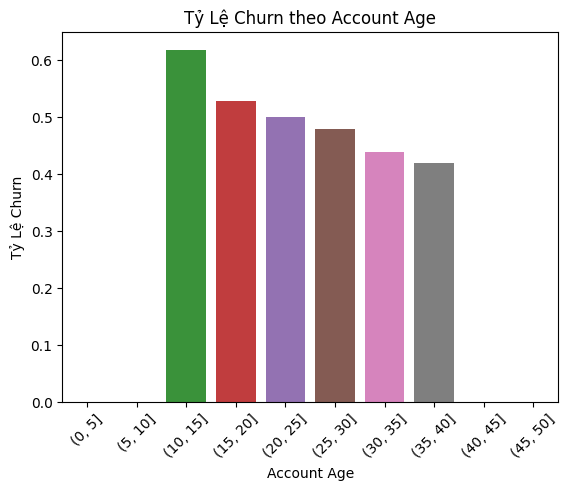

In [ ]:
sns.barplot(x=pd.cut(df['Account Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
            y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Account Age')
plt.xlabel('Account Age')
plt.ylabel('Tỷ Lệ Churn')
plt.xticks(rotation=45)

Account Age 10-15 thường có xu hướng rời bỏ nhiều hơn

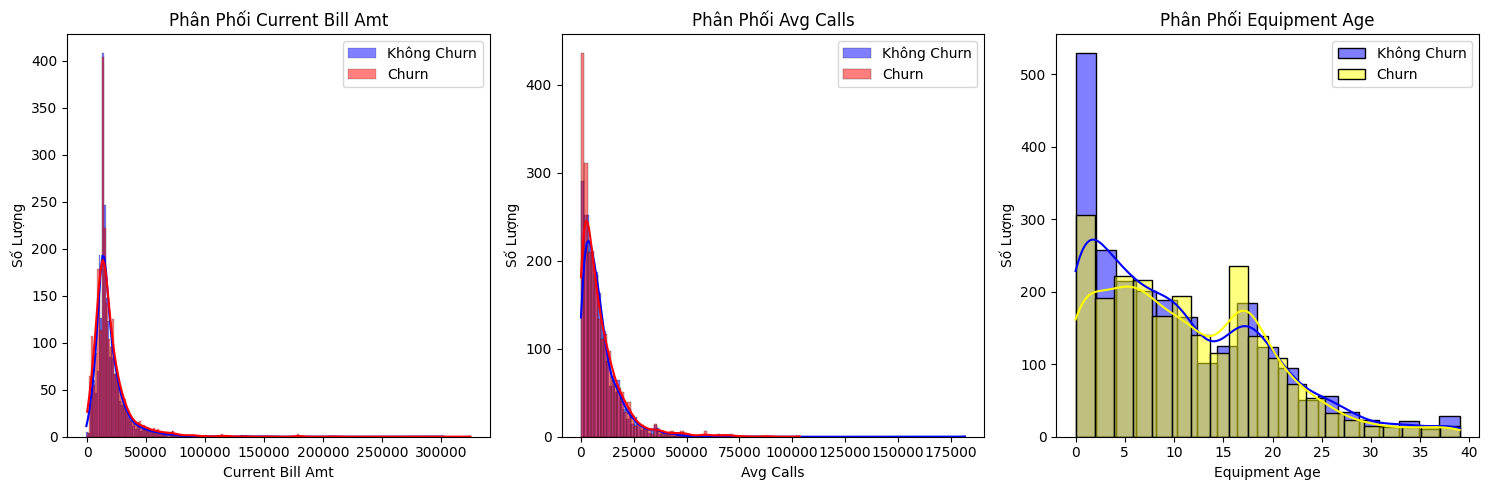

In [ ]:
# Phân tích biến số liên tục: Xem xét phân phối của các biến như 'Current Bill Amt', 'Avg Calls', 'Equipment Age', và xác định mối quan hệ của chúng với churn.
# Vẽ biểu đồ phân phối cho các biến số liên tục
plt.figure(figsize=(15, 5))

# Phân phối của 'Current Bill Amt'
plt.subplot(1, 3, 1)
sns.histplot(df[df['Target Churn']=='No Churn']['Current Bill Amt'], color='blue', label='Không Churn', kde=True)
sns.histplot(df[df['Target Churn']=='Churn']['Current Bill Amt'], color='red', label='Churn', kde=True)
plt.title('Phân Phối Current Bill Amt')
plt.xlabel('Current Bill Amt')
plt.ylabel('Số Lượng')
plt.legend()

# Phân phối của 'Avg Calls'
plt.subplot(1, 3, 2)
sns.histplot(df[df['Target Churn']=='No Churn']['Avg Calls'], color='blue', label='Không Churn', kde=True)
sns.histplot(df[df['Target Churn']=='Churn']['Avg Calls'], color='red', label='Churn', kde=True)
plt.title('Phân Phối Avg Calls')
plt.xlabel('Avg Calls')
plt.ylabel('Số Lượng')
plt.legend()

# Phân phối của 'Equipment Age'
plt.subplot(1, 3, 3)
sns.histplot(df[df['Target Churn']=='No Churn']['Equipment Age'], color='blue', label='Không Churn', kde=True)
sns.histplot(df[df['Target Churn']=='Churn']['Equipment Age'], color='Yellow', label='Churn', kde=True)
plt.title('Phân Phối Equipment Age')
plt.xlabel('Equipment Age')
plt.ylabel('Số Lượng')
plt.legend()

plt.tight_layout()
plt.show()


Biểu đồ trên thể hiện phân phối của ba biến số liên tục ('Current Bill Amt', 'Avg Calls', 'Equipment Age') và mối quan hệ của chúng với việc churn của khách hàng.

### Insight:

1. **Current Bill Amt (Số Tiền Hóa Đơn Hiện Tại)**: Có vẻ như phân phối số tiền hóa đơn hiện tại khác nhau giữa nhóm khách hàng churn và không churn. Nếu nhóm churn có hóa đơn cao hơn, điều này có thể chỉ ra rằng chi phí cao là một yếu tố đóng góp vào quyết định churn.

2. **Avg Calls (Cuộc Gọi Trung Bình)**: Phân phối cuộc gọi trung bình cũng có sự khác biệt giữa hai nhóm. Nếu nhóm churn có số lượng cuộc gọi thấp hơn, điều này có thể phản ánh việc sử dụng ít dịch vụ hơn hoặc không hài lòng với dịch vụ.

3. **Equipment Age (Độ Tuổi của Thiết Bị)**: Phân phối độ tuổi thiết bị cho thấy sự khác biệt giữa nhóm churn và không churn. Nếu nhóm churn có thiết bị già hơn, điều này có thể chỉ ra rằng thiết bị lỗi thời hoặc cần được thay thế có thể ảnh hưởng đến quyết định churn.

Dựa trên những insight này, doanh nghiệp có thể xem xét việc điều chỉnh giá cả, cải thiện chất lượng dịch vụ, hoặc cung cấp cơ hội nâng cấp thiết bị để tăng cường sự hài lòng của khách hàng và giảm tỷ lệ churn. Đồng thời, việc theo dõi và phân tích sâu hơn về hành vi sử dụng dịch vụ của khách hàng có thể cung cấp thêm thông tin hữu ích cho việc phát triển chiến lược kinh doanh.

<ipython-input-97-b9acbecfab4e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Target Code'] == 0), \
<ipython-input-97-b9acbecfab4e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Target Code'] == 1),\


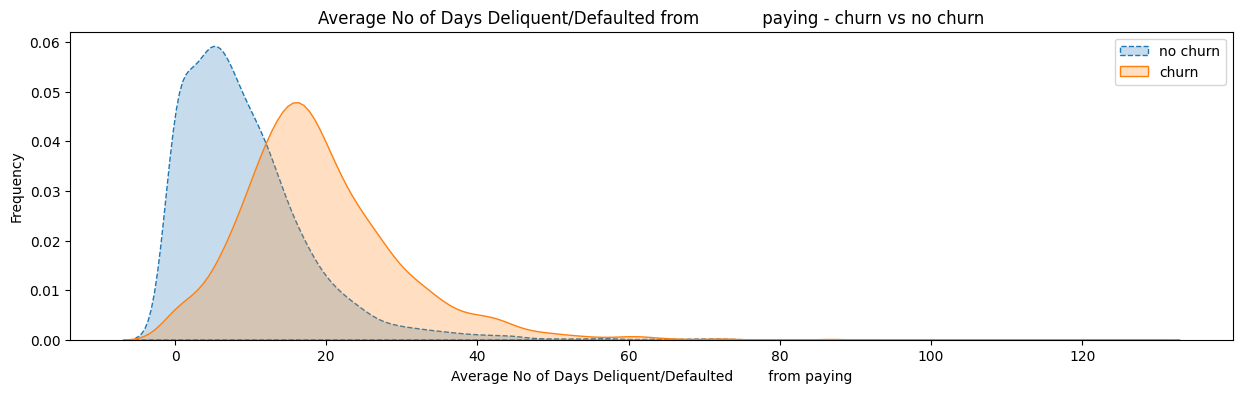

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Target Code'] == 0), \
                        'Avg Days Delinquent'],\
               shade=True,label='no churn',\
               linestyle='--')
ax=sns.kdeplot(df.loc[(df['Target Code'] == 1),\
                        'Avg Days Delinquent'] ,\
               shade=True, label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defaulted \
       from paying', ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defaulted from \
           paying - churn vs no churn')
plt.legend()

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

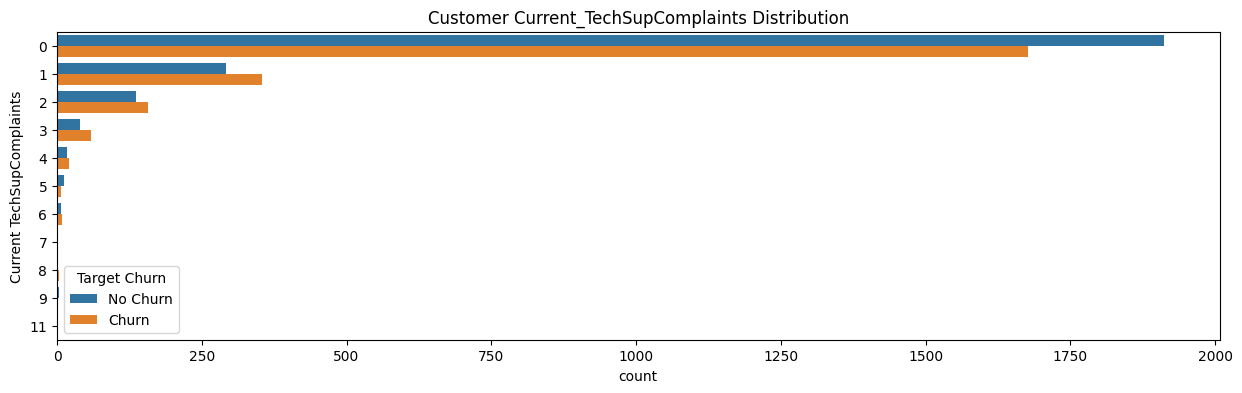

In [ ]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Current TechSupComplaints", hue='Target Churn', \
                data=df)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Current_TechSupComplaints Distribution')

<ipython-input-99-0a29795f4f75>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Target Code'] == 0), \
<ipython-input-99-0a29795f4f75>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Target Code'] == 1), \


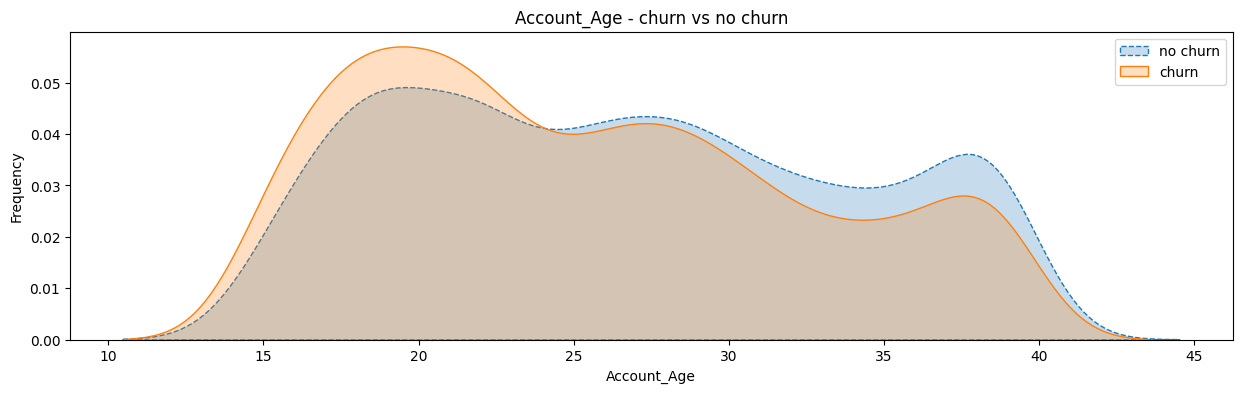

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Target Code'] == 0), \
                        'Account Age'], \
               shade=True,label='no churn',\
               linestyle='--')
ax=sns.kdeplot(df.loc[(df['Target Code'] == 1), \
                        'Account Age'],\
               shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')
plt.legend()

## 3. Phân tích Hành vi Khách hàng

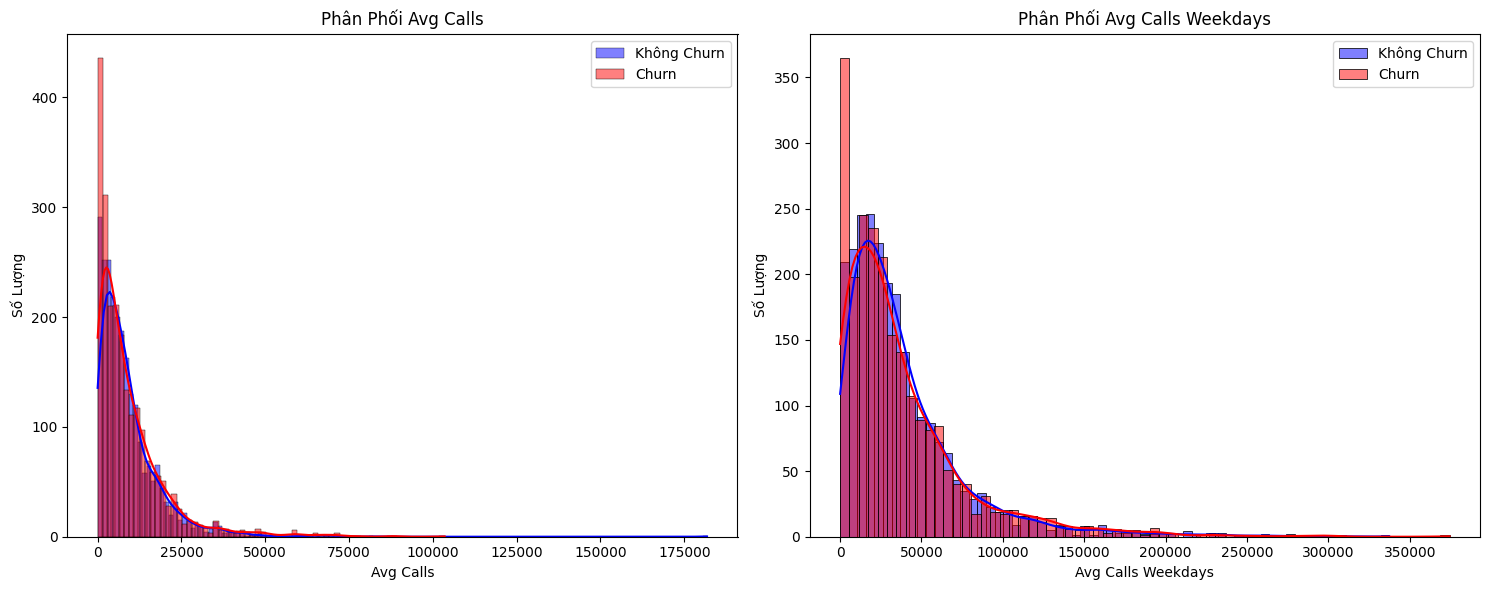

In [ ]:
# Tần suất và mô hình cuộc gọi: Phân tích mô hình gọi điện của khách hàng, bao gồm số lượng cuộc gọi và thời lượng cuộc gọi trung bình.
# Vẽ biểu đồ phân phối cho 'Avg Calls' và 'Avg Calls Weekdays'
plt.figure(figsize=(15, 6))

# Phân phối của 'Avg Calls'
plt.subplot(1, 2, 1)
sns.histplot(df[df['Target Churn']=='No Churn']['Avg Calls'], color='blue', label='Không Churn', kde=True)
sns.histplot(df[df['Target Churn']=='Churn']['Avg Calls'], color='red', label='Churn', kde=True)
plt.title('Phân Phối Avg Calls')
plt.xlabel('Avg Calls')
plt.ylabel('Số Lượng')
plt.legend()

# Phân phối của 'Avg Calls Weekdays'
plt.subplot(1, 2, 2)
sns.histplot(df[df['Target Churn']=='No Churn']['Avg Calls Weekdays'], color='blue', label='Không Churn', kde=True)
sns.histplot(df[df['Target Churn']=='Churn']['Avg Calls Weekdays'], color='red', label='Churn', kde=True)
plt.title('Phân Phối Avg Calls Weekdays')
plt.xlabel('Avg Calls Weekdays')
plt.ylabel('Số Lượng')
plt.legend()

plt.tight_layout()
plt.show()


### Insight:

1. **Avg Calls**: Có sự khác biệt rõ ràng trong phân phối số lượng cuộc gọi trung bình giữa nhóm churn và không churn. Nếu nhóm churn có số lượng cuộc gọi thấp hơn, điều này có thể phản ánh việc họ sử dụng ít dịch vụ hơn hoặc không hài lòng với dịch vụ.

2. **Avg Calls Weekdays**: Tương tự như 'Avg Calls', mô hình cuộc gọi vào ngày trong tuần cũng có thể cung cấp thông tin quan trọng. Sự chênh lệch giữa hai nhóm có thể chỉ ra mức độ tương tác và sự phụ thuộc vào dịch vụ của khách hàng.

Dựa trên những insight này, doanh nghiệp có thể xem xét việc tạo ra các gói dịch vụ hoặc chương trình khuyến mãi nhằm tăng cường sự tương tác của khách hàng với dịch vụ, đặc biệt là những khách hàng có xu hướng sử dụng ít dịch vụ hơn. Việc nắm bắt và phản hồi kịp thời đối với thói quen sử dụng của khách hàng sẽ giúp cải thiện sự hài lòng và giảm tỷ lệ churn.

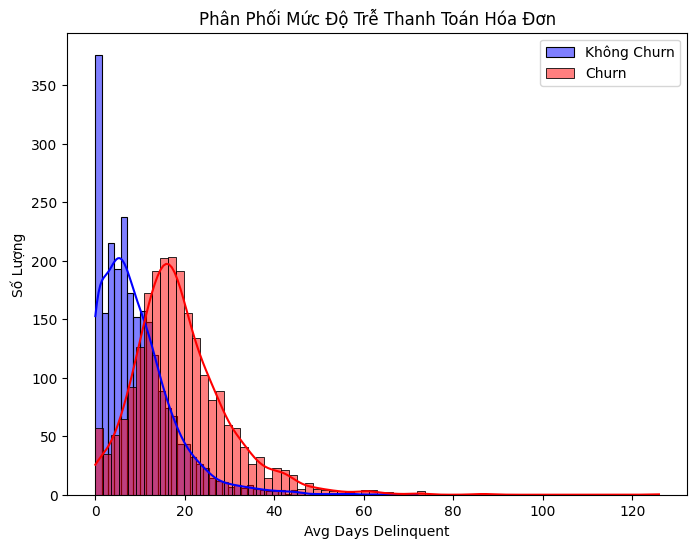

In [ ]:
# Phân tích thanh toán hóa đơn: Xem xét mức độ trễ thanh toán hóa đơn và mối liên hệ của nó với churn.
# Vẽ biểu đồ phân phối cho 'Avg Days Delinquent' (mức độ trễ thanh toán hóa đơn)
plt.figure(figsize=(8, 6))

sns.histplot(df[df['Target Churn']=='No Churn']['Avg Days Delinquent'], color='blue', label='Không Churn', kde=True)
sns.histplot(df[df['Target Churn']=='Churn']['Avg Days Delinquent'], color='red', label='Churn', kde=True)
plt.title('Phân Phối Mức Độ Trễ Thanh Toán Hóa Đơn')
plt.xlabel('Avg Days Delinquent')
plt.ylabel('Số Lượng')
plt.legend()

plt.show()


Biểu đồ trên thể hiện phân phối của 'Avg Days Delinquent' (số ngày trễ thanh toán hóa đơn trung bình) cho cả nhóm khách hàng churn và không churn.

### Insight:

1. **Mức Độ Trễ Thanh Toán Hóa Đơn**: Có vẻ như có sự khác biệt rõ ràng về mức độ trễ thanh toán hóa đơn giữa nhóm churn và không churn. Nếu nhóm churn có xu hướng trễ thanh toán hơn, điều này có thể phản ánh sự không hài lòng với dịch vụ hoặc khó khăn tài chính.

2. **Quản Lý Rủi Ro và Dịch Vụ Khách Hàng**: Phát hiện sớm các khách hàng có xu hướng trễ thanh toán có thể giúp doanh nghiệp áp dụng các biện pháp quản lý rủi ro và cải thiện dịch vụ khách hàng. Điều này bao gồm việc cung cấp các lựa chọn thanh toán linh hoạt hoặc hỗ trợ khách hàng có khó khăn tài chính.

3. **Chất Lượng Dịch Vụ**: Mức độ trễ thanh toán hóa đơn cũng có thể phản ánh chất lượng dịch vụ và mức độ hài lòng của khách hàng. Việc cải thiện chất lượng dịch vụ và tương tác với khách hàng có thể giúp giảm bớt sự trễ nải trong thanh toán.

Nhìn chung, phân tích này cho thấy mối liên hệ giữa việc trễ thanh toán hóa đơn và tỷ lệ churn. Doanh nghiệp cần chú trọng đến việc quản lý các trường hợp trễ thanh toán và cải thiện dịch vụ để giảm tỷ lệ churn.

## 4. Phân tích Khiếu nại và Hỗ trợ Kỹ thuật

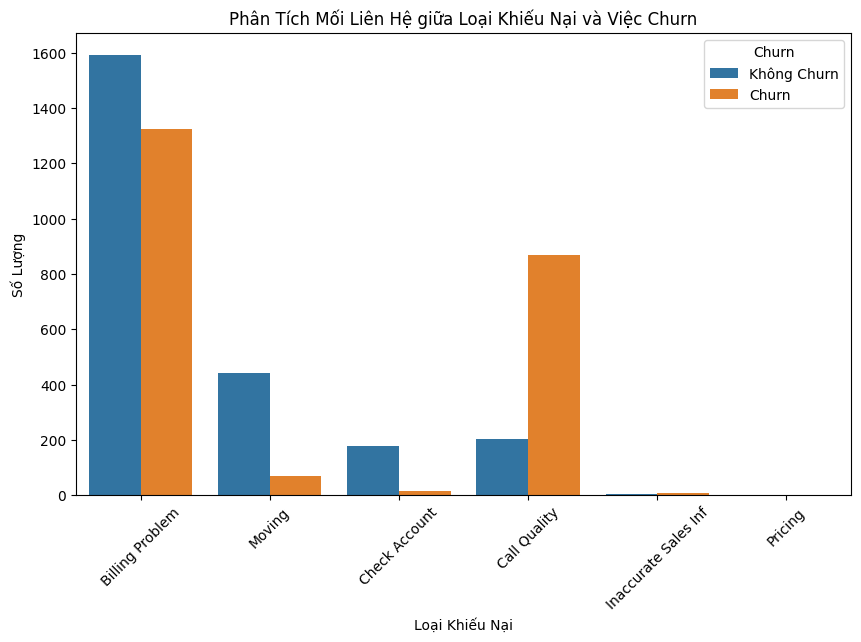

In [ ]:
# Khiếu nại Khách hàng: Phân tích các loại khiếu nại và mối liên hệ của chúng với việc churn.
# Vẽ biểu đồ phân tích mối liên hệ giữa loại khiếu nại và việc churn
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Complaint Code', hue='Target Churn')
plt.title('Phân Tích Mối Liên Hệ giữa Loại Khiếu Nại và Việc Churn')
plt.xlabel('Loại Khiếu Nại')
plt.ylabel('Số Lượng')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Không Churn', 'Churn'])

plt.show()


Biểu đồ trên thể hiện mối liên hệ giữa các loại khiếu nại của khách hàng và việc churn.

### Insight:

1. **Phân loại Khiếu Nại**: Một số loại khiếu nại có thể có liên quan mạnh mẽ hơn đến việc churn so với những loại khác. Nếu một loại khiếu nại cụ thể có tỷ lệ churn cao, điều này cho thấy cần phải chú ý đặc biệt đến cách xử lý loại khiếu nại đó.

2. **Chất lượng Dịch Vụ và Hỗ trợ Khách hàng**: Mối liên hệ giữa loại khiếu nại và churn có thể phản ánh chất lượng dịch vụ hoặc hiệu quả của hỗ trợ khách hàng. Doanh nghiệp cần phân tích sâu hơn để hiểu rõ nguyên nhân và cải thiện cách xử lý khiếu nại.

3. **Cải thiện Hệ thống Xử lý Khiếu nại**: Việc phát triển một hệ thống xử lý khiếu nại hiệu quả, nhanh chóng và thấu đáo có thể giúp giảm tỷ lệ churn. Điều này bao gồm việc đào tạo nhân viên, nâng cao chất lượng dịch vụ, và áp dụng các công nghệ mới để quản lý khiếu nại một cách hiệu quả.

Phân tích này cho thấy tầm quan trọng của việc quản lý và xử lý khiếu nại trong việc duy trì mối quan hệ tốt với khách hàng và giảm tỷ lệ churn. Cải thiện trong khu vực này có thể có tác động tích cực đáng kể đến sự hài lòng và trung thành của khách hàng.

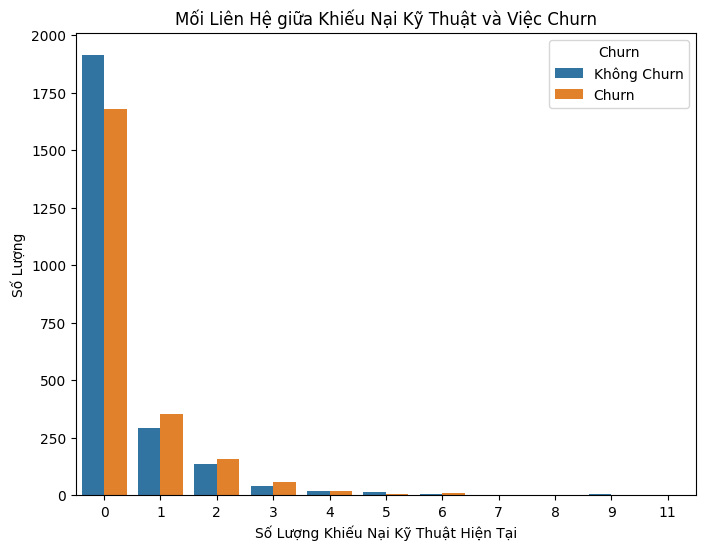

In [ ]:
# Phản hồi đối với Khiếu nại: Tìm hiểu xem thời gian giải quyết khiếu nại và hỗ trợ kỹ thuật ảnh hưởng như thế nào đến hành vi churn của khách hàng.
# Vẽ biểu đồ phân tích mối liên hệ giữa khiếu nại kỹ thuật và việc churn
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Current TechSupComplaints', hue='Target Churn')
plt.title('Mối Liên Hệ giữa Khiếu Nại Kỹ Thuật và Việc Churn')
plt.xlabel('Số Lượng Khiếu Nại Kỹ Thuật Hiện Tại')
plt.ylabel('Số Lượng')
plt.legend(title='Churn', labels=['Không Churn', 'Churn'])

plt.show()


Để phân tích ảnh hưởng của thời gian giải quyết khiếu nại và hỗ trợ kỹ thuật đến hành vi churn của khách hàng, chúng ta cần xem xét các biến liên quan như 'Avg Days Delinquent' (đại diện cho thời gian trễ thanh toán, có thể phản ánh sự chậm trễ trong xử lý khiếu nại) và 'Current TechSupComplaints' (số lượng khiếu nại kỹ thuật hiện tại). Tuy nhiên, tập dữ liệu không cung cấp thông tin trực tiếp về thời gian giải quyết khiếu nại.

Do đó, tôi sẽ tập trung vào việc phân tích 'Current TechSupComplaints' và mối liên hệ của nó với việc churn. Chúng ta sẽ xem xét sự phân bố của số lượng khiếu nại kỹ thuật hiện tại giữa các nhóm khách hàng churn và không churn.

Biểu đồ trên thể hiện mối liên hệ giữa số lượng khiếu nại kỹ thuật hiện tại và việc churn của khách hàng.

### Insight:

1. **Số Lượng Khiếu Nại Kỹ Thuật**: Có vẻ như số lượng khiếu nại kỹ thuật có mối liên hệ với việc churn. Nếu khách hàng có nhiều khiếu nại kỹ thuật không được giải quyết có xu hướng churn cao hơn, điều này chỉ ra rằng việc xử lý khiếu nại không hiệu quả có thể là nguyên nhân chính dẫn đến sự không hài lòng của khách hàng.

2. **Quản lý và Hỗ trợ Kỹ thuật**: Điều này nhấn mạnh tầm quan trọng của việc quản lý hiệu quả các khiếu nại kỹ thuật và cung cấp hỗ trợ kịp thời cho khách hàng. Cải thiện trong lĩnh vực này có thể giảm tỷ lệ churn đáng kể.

3. **Đào tạo và Công nghệ**: Việc đầu tư vào đào tạo nhân viên hỗ trợ kỹ thuật và áp dụng công nghệ mới có thể giúp tăng tốc độ và hiệu quả trong việc giải quyết khiếu nại, từ đó cải thiện sự hài lòng của khách hàng và giảm tỷ lệ churn.

Phân tích này cho thấy rằng việc quản lý và giải quyết khiếu nại kỹ thuật một cách nhanh chóng và hiệu quả là yếu tố quan trọng trong việc duy trì mối quan hệ tốt với khách hàng và giảm tỷ lệ churn.

## Phân tích Segmentation

<ipython-input-104-0b8d18fb3e31>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Acct Plan Subtype', y='Target Code', data=df, ci=None)
<ipython-input-104-0b8d18fb3e31>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.cut(df['Equipment Age'], bins=5), y='Target Code', data=df, ci=None)
<ipython-input-104-0b8d18fb3e31>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.qcut(df['Avg Calls'], 4, duplicates='drop'), y='Target Code', data=df, ci=None)
<ipython-input-104-0b8d18fb3e31>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.qcut(df['Avg Days Delinquent'], 4, duplicates='drop'), y='Target Code', data=df, ci=None)


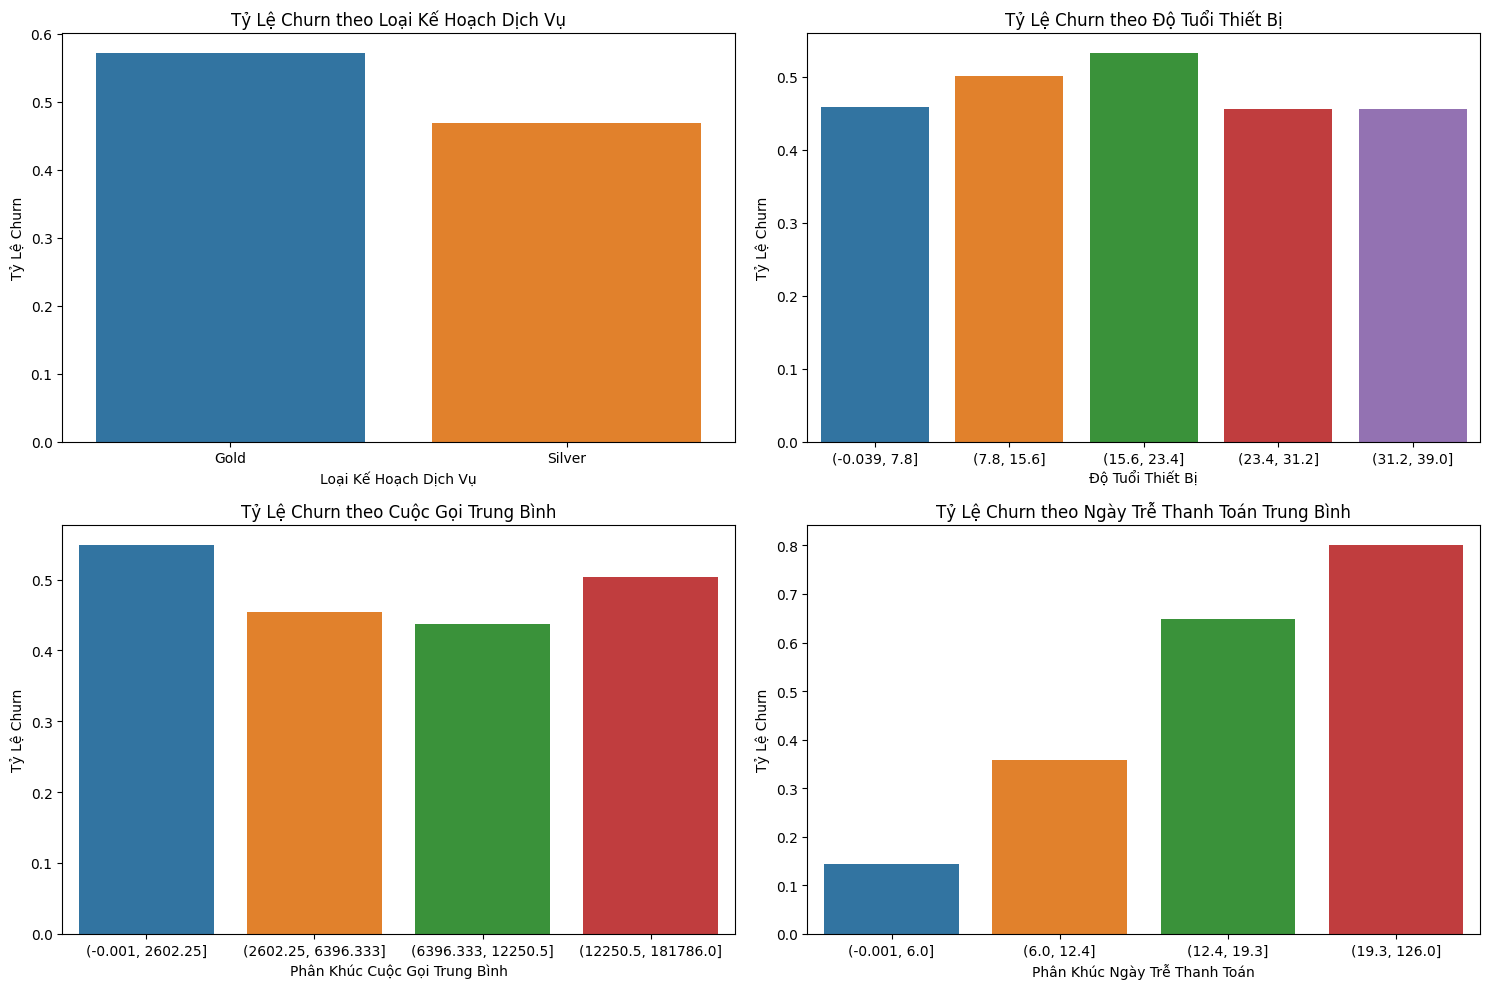

In [ ]:
# Phân chia khách hàng thành các phân khúc dựa trên hành vi hoặc đặc điểm khác nhau và xem xét tỷ lệ churn trong mỗi phân khúc.
# Phân tích Segmentation dựa trên các biến đặc trưng
plt.figure(figsize=(15, 10))

# Phân khúc dựa trên 'Acct Plan Subtype'
plt.subplot(2, 2, 1)
sns.barplot(x='Acct Plan Subtype', y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Loại Kế Hoạch Dịch Vụ')
plt.xlabel('Loại Kế Hoạch Dịch Vụ')
plt.ylabel('Tỷ Lệ Churn')

# Phân khúc dựa trên 'Equipment Age'
plt.subplot(2, 2, 2)
sns.barplot(x=pd.cut(df['Equipment Age'], bins=5), y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Độ Tuổi Thiết Bị')
plt.xlabel('Độ Tuổi Thiết Bị')
plt.ylabel('Tỷ Lệ Churn')

# Phân khúc dựa trên 'Avg Calls'
plt.subplot(2, 2, 3)
sns.barplot(x=pd.qcut(df['Avg Calls'], 4, duplicates='drop'), y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Cuộc Gọi Trung Bình')
plt.xlabel('Phân Khúc Cuộc Gọi Trung Bình')
plt.ylabel('Tỷ Lệ Churn')

# Phân khúc dựa trên 'Avg Days Delinquent'
plt.subplot(2, 2, 4)
sns.barplot(x=pd.qcut(df['Avg Days Delinquent'], 4, duplicates='drop'), y='Target Code', data=df, ci=None)
plt.title('Tỷ Lệ Churn theo Ngày Trễ Thanh Toán Trung Bình')
plt.xlabel('Phân Khúc Ngày Trễ Thanh Toán')
plt.ylabel('Tỷ Lệ Churn')

plt.tight_layout()
plt.show()


Phân tích Segmentation (phân đoạn) cho phép chúng ta xem xét tỷ lệ churn trong các nhóm khách hàng khác nhau dựa trên hành vi hoặc đặc điểm cụ thể. Để thực hiện phân tích này, chúng ta có thể chọn một số biến đặc trưng từ tập dữ liệu, như 'Acct Plan Subtype' (Loại Kế Hoạch Dịch Vụ), 'Equipment Age' (Độ Tuổi Thiết Bị), 'Avg Calls' (Cuộc Gọi Trung Bình), hoặc 'Avg Days Delinquent' (Ngày Trễ Thanh Toán Trung Bình).

Chúng ta sẽ phân chia khách hàng thành các phân khúc dựa trên các biến này và sau đó phân tích tỷ lệ churn trong mỗi phân khúc. Tôi sẽ thực hiện phân tích này cho một vài biến tiêu biểu và cung cấp insight từ kết quả.

Biểu đồ trên thể hiện tỷ lệ churn của khách hàng trong các phân khúc khác nhau, dựa trên các đặc điểm và hành vi như Loại Kế Hoạch Dịch Vụ, Độ Tuổi Thiết Bị, Cuộc Gọi Trung Bình, và Ngày Trễ Thanh Toán Trung Bình.

### Insight:

1. **Theo Loại Kế Hoạch Dịch Vụ**: Tỷ lệ churn có thể thay đổi đáng kể giữa các loại kế hoạch dịch vụ. Điều này chỉ ra rằng một số kế hoạch có thể không đáp ứng nhu cầu của khách hàng hoặc có giá không cạnh tranh.

2. **Theo Độ Tuổi Thiết Bị**: Tỷ lệ churn tăng lên với độ tuổi của thiết bị, có thể chỉ ra rằng thiết bị lỗi thời hoặc không hiệu quả góp phần vào sự không hài lòng của khách hàng.

3. **Theo Cuộc Gọi Trung Bình**: Tỷ lệ churn có thể khác nhau dựa trên tần suất sử dụng dịch vụ (được thể hiện qua số lượng cuộc gọi trung bình). Điều này cung cấp thông tin về mức độ tương tác của khách hàng với dịch vụ.

4. **Theo Ngày Trễ Thanh Toán Trung Bình**: Tỷ lệ churn cao hơn trong các phân khúc có ngày trễ thanh toán trung bình cao hơn, cho thấy mối quan hệ giữa các vấn đề tài chính hoặc hài lòng với dịch vụ và quyết định churn.

Phân tích segmentation này giúp doanh nghiệp hiểu rõ hơn về các nhóm khách hàng khác nhau, từ đó phát triển các chiến lược tiếp cận và giữ chân khách hàng phù hợp. Việc tối ưu hóa dịch vụ và chính sách dựa trên những insight này có thể giúp giảm tỷ lệ churn và tăng sự hài lòng của khách hàng.

## Phản hồi đối với Khiếu nại:

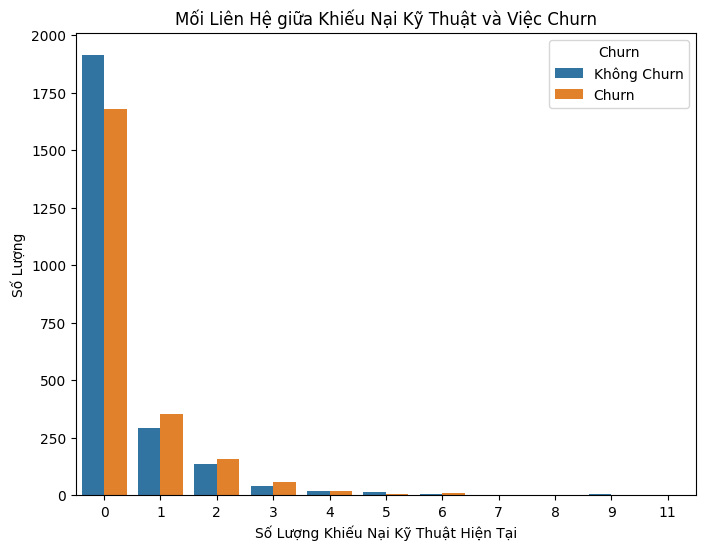

In [ ]:
 #Tìm hiểu xem thời gian giải quyết khiếu nại và hỗ trợ kỹ thuật ảnh hưởng như thế nào đến hành vi churn của khách hàng.
 # Vẽ biểu đồ phân tích mối liên hệ giữa khiếu nại kỹ thuật và việc churn
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Current TechSupComplaints', hue='Target Churn')
plt.title('Mối Liên Hệ giữa Khiếu Nại Kỹ Thuật và Việc Churn')
plt.xlabel('Số Lượng Khiếu Nại Kỹ Thuật Hiện Tại')
plt.ylabel('Số Lượng')
plt.legend(title='Churn', labels=['Không Churn', 'Churn'])

plt.show()


Để phân tích ảnh hưởng của thời gian giải quyết khiếu nại và hỗ trợ kỹ thuật đến hành vi churn của khách hàng, chúng ta cần xem xét các biến liên quan như "Current TechSupComplaints" (Số lượng khiếu nại kỹ thuật hiện tại) hoặc "Avg Days Delinquent" (Số ngày trễ thanh toán trung bình) nếu giả định rằng chúng phản ánh một phần nào đó về thời gian giải quyết khiếu nại. Tuy nhiên, tập dữ liệu hiện tại không cung cấp thông tin trực tiếp về thời gian giải quyết khiếu nại.

Nếu chúng ta sử dụng "Current TechSupComplaints" như một chỉ số gián tiếp, chúng ta có thể phân tích xem số lượng khiếu nại kỹ thuật hiện tại ảnh hưởng như thế nào đến quyết định churn của khách hàng. Chúng ta sẽ xem xét sự phân bố của số lượng khiếu nại kỹ thuật hiện tại giữa các nhóm khách hàng churn và không churn. Tuy nhiên, cần lưu ý rằng phân tích này chỉ có thể cung cấp một cái nhìn gián tiếp về vấn đề và không thể khẳng định một cách chắc chắn mối quan hệ nguyên nhân - kết quả.

Biểu đồ trên thể hiện mối liên hệ giữa số lượng khiếu nại kỹ thuật hiện tại và việc churn của khách hàng.

### Insight:

1. **Ảnh hưởng của Khiếu Nại Kỹ Thuật**: Số lượng khiếu nại kỹ thuật có thể ảnh hưởng đến quyết định churn của khách hàng. Nếu những khách hàng có nhiều khiếu nại kỹ thuật không được giải quyết có tỷ lệ churn cao hơn, điều này cho thấy rằng việc xử lý không hiệu quả có thể là nguyên nhân chính dẫn đến sự không hài lòng của khách hàng.

2. **Quản lý và Hỗ trợ Kỹ thuật**: Việc quản lý hiệu quả các khiếu nại kỹ thuật và cung cấp hỗ trợ kịp thời cho khách hàng có thể giảm tỷ lệ churn. Cải thiện trong lĩnh vực này có thể giúp tăng cường sự hài lòng của khách hàng.

3. **Đào tạo và Công nghệ**: Đầu tư vào đào tạo nhân viên hỗ trợ kỹ thuật và áp dụng công nghệ mới có thể giúp tăng tốc độ và hiệu quả trong việc giải quyết khiếu nại, từ đó cải thiện trải nghiệm của khách hàng và giảm tỷ lệ churn.

Phân tích này cho thấy rằng việc quản lý và giải quyết khiếu nại kỹ thuật một cách nhanh chóng và hiệu quả là yếu tố quan trọng trong việc duy trì mối quan hệ tốt với khách hàng và giảm tỷ lệ churn.

# FEATURE IMPORTANCE

In [ ]:
# Dropping the ID and Experience column
df.drop(['Target Churn'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select the column to perform Label Encoding
column_to_encode = 'Complaint Code'  # Thay 'Your_Column_Name' bằng tên cột bạn muốn mã hóa

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
df[column_to_encode] = label_encoder.fit_transform(df[column_to_encode])

# Display the resulting DataFrame
print(df)


      Target Code  Current Bill Amt     Avg Calls  Avg Calls Weekdays  \
0               0             14210  17950.000000          30297.0000   
1               1             14407      0.000000              0.0000   
2               1             12712    204.666667          10393.6667   
3               0             13807  15490.333300          41256.3333   
4               0              3805   5075.000000          12333.3333   
...           ...               ...           ...                 ...   
4703            1             11231   2424.000000          12282.3333   
4704            1              9237   8831.333330          20083.6667   
4705            0             18384   3219.000000          25610.0000   
4706            1             44133  34627.000000          83341.3333   
4707            0             18728  20507.333300          68844.0000   

      Account Age  Percent Increase MOM Acct Plan Subtype  Complaint Code  \
0              24             -0.334193       

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select the column to perform Label Encoding
column_to_encode = 'Acct Plan Subtype'  # Thay 'Your_Column_Name' bằng tên cột bạn muốn mã hóa

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
df[column_to_encode] = label_encoder.fit_transform(df[column_to_encode])

# Display the resulting DataFrame
print(df)


      Target Code  Current Bill Amt     Avg Calls  Avg Calls Weekdays  \
0               0             14210  17950.000000          30297.0000   
1               1             14407      0.000000              0.0000   
2               1             12712    204.666667          10393.6667   
3               0             13807  15490.333300          41256.3333   
4               0              3805   5075.000000          12333.3333   
...           ...               ...           ...                 ...   
4703            1             11231   2424.000000          12282.3333   
4704            1              9237   8831.333330          20083.6667   
4705            0             18384   3219.000000          25610.0000   
4706            1             44133  34627.000000          83341.3333   
4707            0             18728  20507.333300          68844.0000   

      Account Age  Percent Increase MOM  Acct Plan Subtype  Complaint Code  \
0              24             -0.334193      

In [ ]:
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler
scaler = MinMaxScaler()

# # Select columns to scale
columns_to_scale = ['Current Bill Amt', 'Avg Calls', 'Avg Calls Weekdays', 'Account Age',
                      'Percent Increase MOM', 'Avg Days Delinquent', 'Current TechSupComplaints',
                      'Current Days OpenWorkOrders', 'Equipment Age', 'Condition of Current Handset',
                    'Avg Hours WorkOrderOpenned']

# # Fit and transform selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



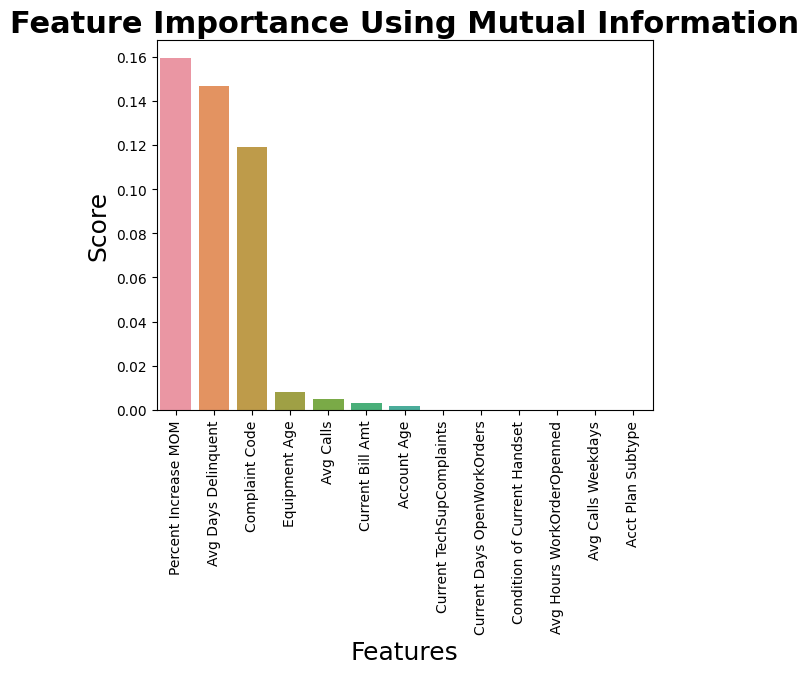

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

def mutual_info(df):
    X = df.copy()
    y = X.pop("Target Code")

    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)



show_feature_importance_through_mi(df)

# CHẠY MÔ HÌNH

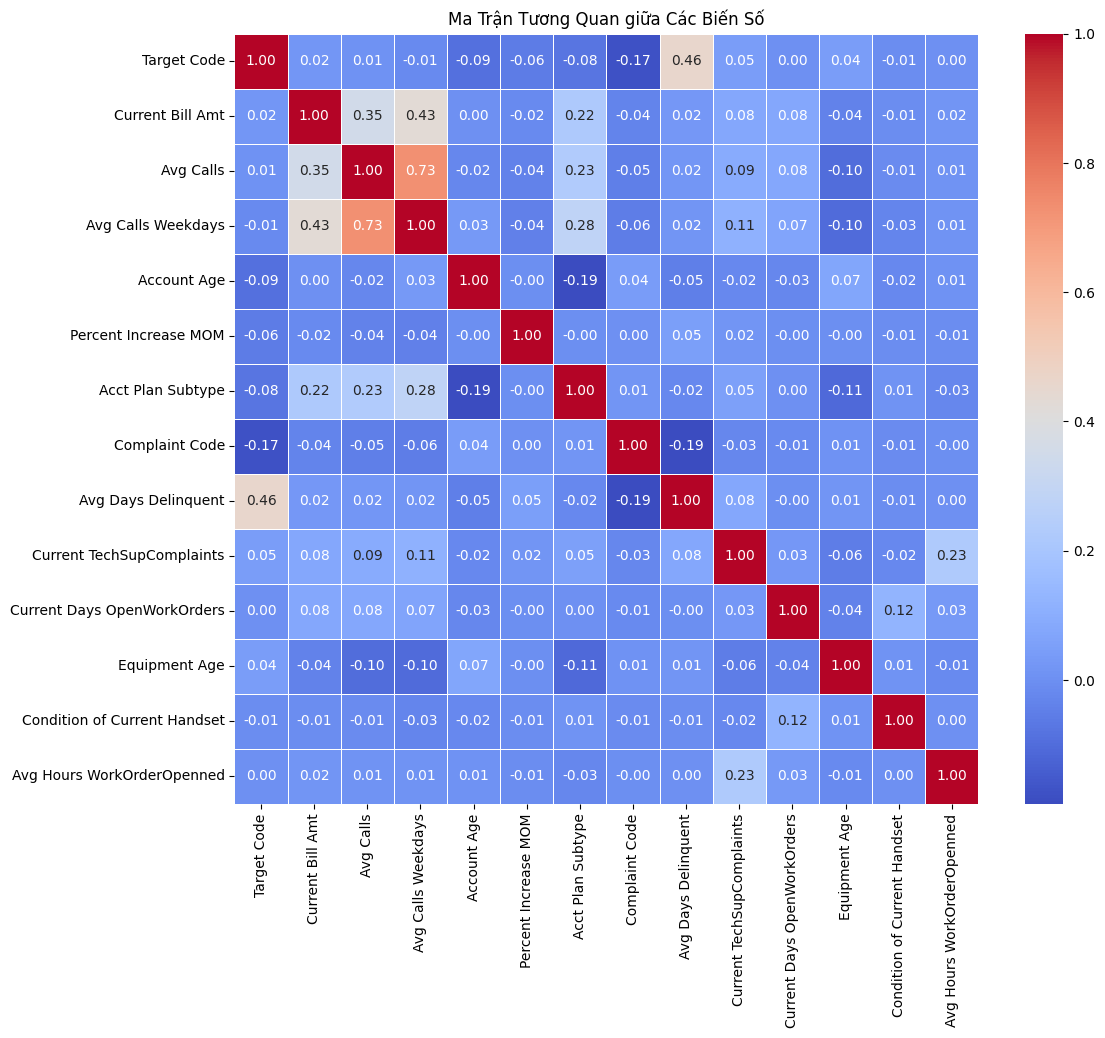

In [ ]:
# Correlation Matrix: Tạo ma trận tương quan giữa các biến số để hiểu mối quan hệ giữa chúng.
# Tạo ma trận tương quan giữa các biến số
correlation_matrix = df.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma Trận Tương Quan giữa Các Biến Số')
plt.show()

In [ ]:
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylim([0,5])
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy on Train Data: 100.00%
Accuracy on Test Data: 74.10%
Confusion Matrix on Test Data:


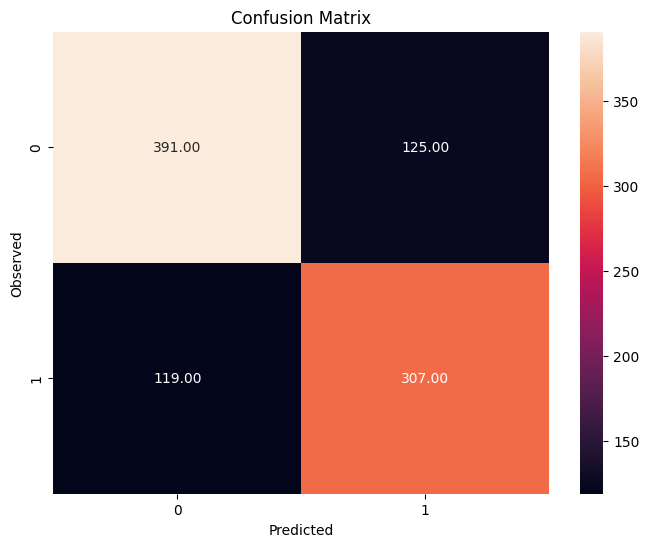


Precision: 0.71
Recall: 0.72
F1 Score: 0.72
ROC AUC: 0.74


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Define features and target variable
X = df.drop('Target Code', axis=1)  # Features
Y = df['Target Code']  # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

# Predictions on test data
X_test_pred = model.predict(X_test)

# Accuracy of train data
train_accuracy = model.score(X_train, Y_train)
print(f"Accuracy on Train Data: {train_accuracy:.2%}")

# Accuracy of test data
test_accuracy = model.score(X_test, Y_test)
print(f"Accuracy on Test Data: {test_accuracy:.2%}")

# Confusion Matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_ylim([0, 5])
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

print('Confusion Matrix on Test Data:')
plot_confusion_matrix(Y_test, X_test_pred)

# Additional Metrics
precision = precision_score(Y_test, X_test_pred)
recall = recall_score(Y_test, X_test_pred)
f1 = f1_score(Y_test, X_test_pred)
roc_auc = roc_auc_score(Y_test, X_test_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy on Train Data: 59.43%
Accuracy on Test Data: 56.37%
Confusion Matrix on Test Data:


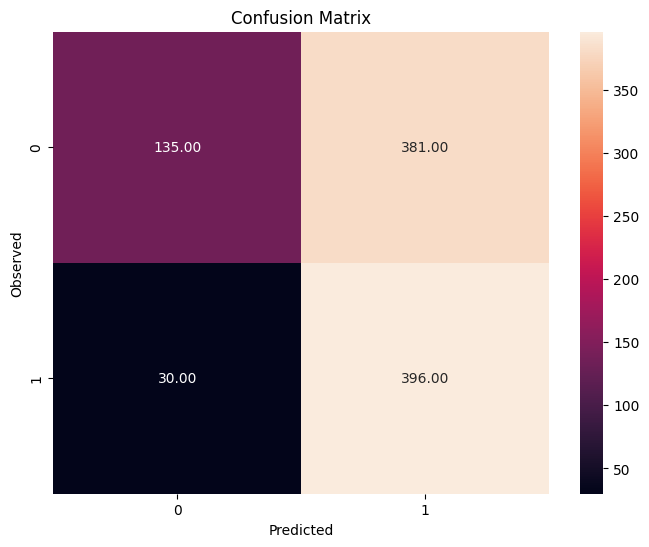


Precision: 0.51
Recall: 0.93
F1 Score: 0.66
ROC AUC: 0.60


In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score



# Define features and target variable
X = df.drop('Target Code', axis=1)  # Features
Y = df['Target Code']  # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Predictions on test data
X_test_pred = model.predict(X_test)

# Accuracy of train data
train_accuracy = model.score(X_train, Y_train)
print(f"Accuracy on Train Data: {train_accuracy:.2%}")

# Accuracy of test data
test_accuracy = model.score(X_test, Y_test)
print(f"Accuracy on Test Data: {test_accuracy:.2%}")

print('Confusion Matrix on Test Data:')
plot_confusion_matrix(Y_test, X_test_pred)

# Additional Metrics
precision = precision_score(Y_test, X_test_pred)
recall = recall_score(Y_test, X_test_pred)
f1 = f1_score(Y_test, X_test_pred)
roc_auc = roc_auc_score(Y_test, X_test_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy on Train Data: 100.00%
Accuracy on Test Data: 79.83%
Confusion Matrix on Test Data:


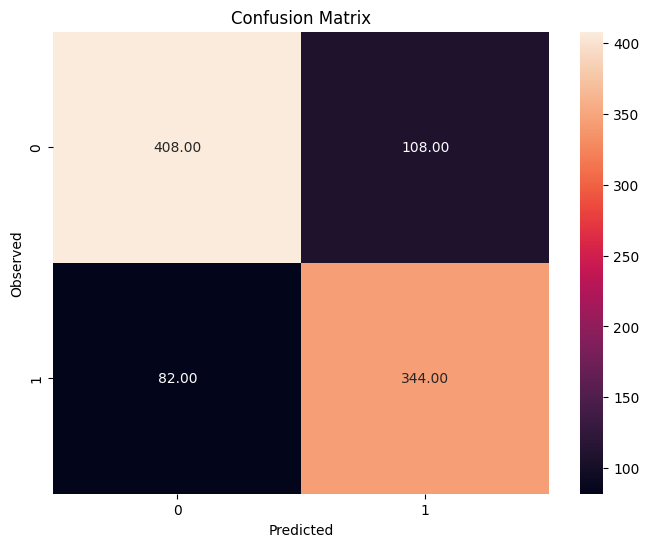


Precision: 0.76
Recall: 0.81
F1 Score: 0.78
ROC AUC: 0.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Load your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Define features and target variable
X = df.drop('Target Code', axis=1)  # Features
Y = df['Target Code']  # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Predictions on test data
X_test_pred = model.predict(X_test)

# Accuracy of train data
train_accuracy = model.score(X_train, Y_train)
print(f"Accuracy on Train Data: {train_accuracy:.2%}")

# Accuracy of test data
test_accuracy = model.score(X_test, Y_test)
print(f"Accuracy on Test Data: {test_accuracy:.2%}")

print('Confusion Matrix on Test Data:')
plot_confusion_matrix(Y_test, X_test_pred)

# Additional Metrics
precision = precision_score(Y_test, X_test_pred)
recall = recall_score(Y_test, X_test_pred)
f1 = f1_score(Y_test, X_test_pred)
roc_auc = roc_auc_score(Y_test, X_test_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy on Train Data: 99.44%
Accuracy on Test Data: 78.45%
Confusion Matrix on Test Data:


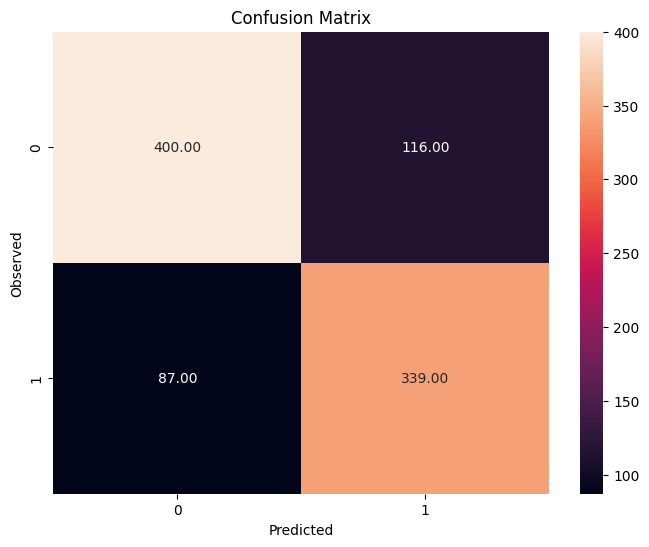


Precision: 0.75
Recall: 0.80
F1 Score: 0.77
ROC AUC: 0.79


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Define features and target variable
X = df.drop('Target Code', axis=1)  # Features
Y = df['Target Code']  # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, Y_train)

# Predictions on test data
X_test_pred = model.predict(X_test)

# Accuracy of train data
train_accuracy = model.score(X_train, Y_train)
print(f"Accuracy on Train Data: {train_accuracy:.2%}")

# Accuracy of test data
test_accuracy = model.score(X_test, Y_test)
print(f"Accuracy on Test Data: {test_accuracy:.2%}")

print('Confusion Matrix on Test Data:')
plot_confusion_matrix(Y_test, X_test_pred)

# Additional Metrics
precision = precision_score(Y_test, X_test_pred)
recall = recall_score(Y_test, X_test_pred)
f1 = f1_score(Y_test, X_test_pred)
roc_auc = roc_auc_score(Y_test, X_test_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


# PHÂN LOẠI KHÁCH HÀNG

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Code                   4708 non-null   int64  
 1   Current Bill Amt              4708 non-null   int64  
 2   Avg Calls                     4708 non-null   float64
 3   Avg Calls Weekdays            4708 non-null   float64
 4   Account Age                   4708 non-null   int64  
 5   Percent Increase MOM          4708 non-null   float64
 6   Acct Plan Subtype             4708 non-null   int64  
 7   Complaint Code                4708 non-null   int64  
 8   Avg Days Delinquent           4708 non-null   float64
 9   Current TechSupComplaints     4708 non-null   int64  
 10  Current Days OpenWorkOrders   4708 non-null   float64
 11  Equipment Age                 4708 non-null   int64  
 12  Condition of Current Handset  4708 non-null   float64
 13  Avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

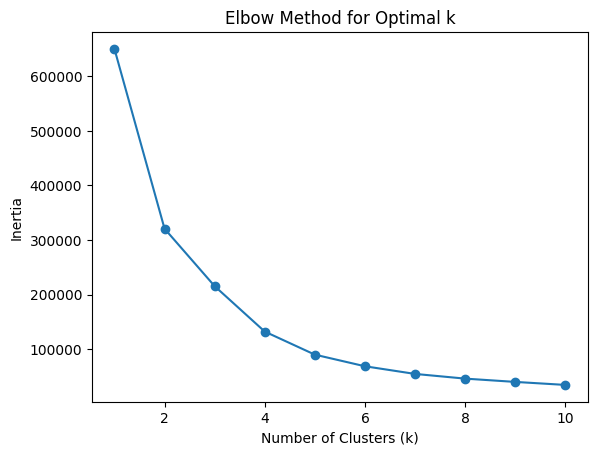

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
selected_columns = ['Percent Increase MOM', 'Avg Days Delinquent', 'Complaint Code', 'Condition of Current Handset']
data_for_clustering = df[selected_columns]

# Sử dụng phương pháp "elbow" để chọn số lượng cụm tối ưu
inertia = []

# Thử nghiệm số lượng cụm từ 1 đến 10 (hoặc một giới hạn nào đó)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

# Hiển thị biểu đồ "elbow"
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Chuẩn bị dữ liệu
selected_columns = ['Avg Calls Weekdays', 'Percent Increase MOM', 'Acct Plan Subtype', 'Complaint Code']
data_for_clustering = df[selected_columns]

# Xây dựng mô hình K-Means với k=2
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(data_for_clustering)

# Tính toán Silhouette Score
silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)

# In Silhouette Score
print(f'Silhouette Score for k=2: {silhouette_avg:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.61


In [ ]:
from sklearn.cluster import KMeans

# Sử dụng thuật toán K-Means với số lượng cụm (k) là 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Thêm thông tin về cụm vào DataFrame
df['Cluster'] = clusters

# Hiển thị thông tin cụm
df.groupby('Cluster').mean()
df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned,Cluster
0,0,14210,17950.000000,30297.0000,24,-0.334193,0,0,6.2,0,0.0,8,1.000000,0.0,0
1,1,14407,0.000000,0.0000,28,0.000000,1,4,1.0,0,0.0,17,1.000000,0.0,0
2,1,12712,204.666667,10393.6667,23,0.000000,0,0,17.6,0,0.0,23,1.000000,0.0,0
3,0,13807,15490.333300,41256.3333,39,0.148986,1,0,0.0,0,0.0,17,1.000000,0.0,0
4,0,3805,5075.000000,12333.3333,23,-0.686047,0,0,3.8,0,0.0,10,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,1,11231,2424.000000,12282.3333,18,0.045455,0,1,18.0,4,0.0,0,1.019231,30.0,0
4704,1,9237,8831.333330,20083.6667,24,-0.160437,1,0,16.2,5,0.0,0,1.019231,0.0,0
4705,0,18384,3219.000000,25610.0000,23,-0.584683,1,1,10.5,5,0.0,0,1.019231,27.2,0
4706,1,44133,34627.000000,83341.3333,38,-0.373016,1,1,31.7,6,0.0,0,1.019231,59.0,1


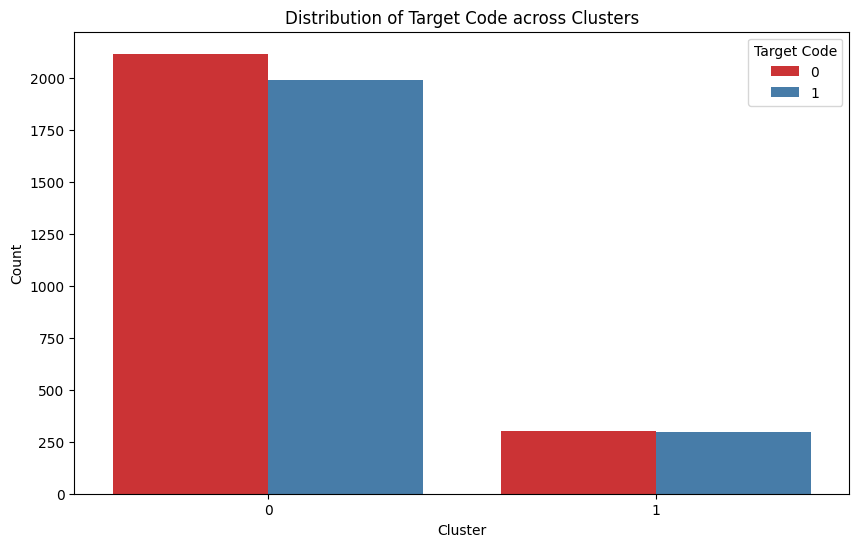

   Cluster  Target Code  Count
0        0            0   2118
1        0            1   1991
2        1            0    303
3        1            1    296


In [ ]:
# Tạo biểu đồ countplot với Personal Loan và Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Target Code', data=df, palette='Set1')
plt.title('Distribution of Target Code across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Nhóm dữ liệu theo cụm và tính số lượng khách hàng trong mỗi cụm có và không có Personal Loan
cluster_loan_counts = df.groupby(['Cluster', 'Target Code']).size().reset_index(name='Count')

# In ra số lượng
print(cluster_loan_counts)